In [1]:
%load_ext autoreload
%autoreload 2

import sys
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import rasterio

sys.path.append('..')
import pymoon
from pymoon.config import *

In [23]:
tex_arr = rasterio.open(PATH_LROC_COLOR_2K).read([1, 2, 3]).astype(int)
tex_arr = np.moveaxis(tex_arr, 0, -1)  # Normalize to [0, 1]

dem_arr = rasterio.open(PATH_LDEM_4).read(1).astype(float)

In [ ]:
N = 1000

alpha_deg = 45
s_vec = [np.sin(np.radians(alpha_deg)), 0, np.cos(np.radians(alpha_deg))]

mask_1 = pymoon.get_moon_mask(
    N=N, s_vec=s_vec, return_mask=True, pointlike_sun=False, shadows=False
)
mask_2 = pymoon.get_moon_mask(
    N=N,
    s_vec=s_vec,
    return_mask=True,
    pointlike_sun=False,
    shadows=False,
    dem=PATH_LDEM_4,
)
mask_3 = pymoon.get_moon_mask(
    N=N, s_vec=s_vec, return_mask=True, pointlike_sun=False, shadows=True, dem=PATH_LDEM_4, shadow_max_steps=100
)

In [61]:
disks = []
for mask in [mask_1, mask_2, mask_3]:
    moon_tex = pymoon.utils.resize_image(tex_arr, dem_arr.shape)
    disk = pymoon.main.render_moon_face(moon_tex, mask, obs_vec=(0, 0, 1), radius=0.8)
    disks.append(disk)

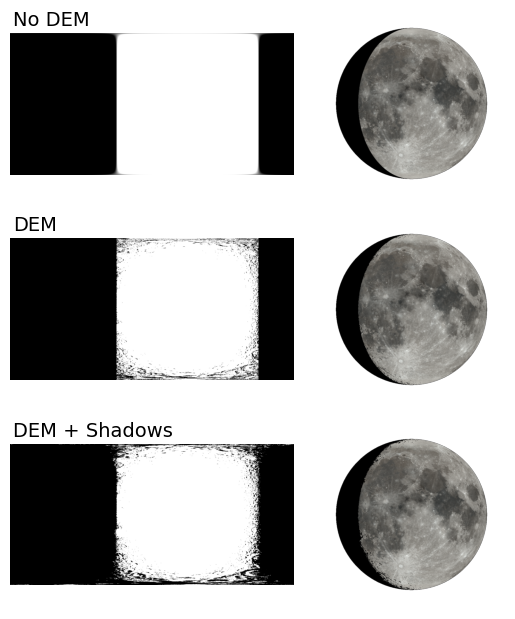

In [ ]:
fs, r = 8, 0.8
fig, axs = plt.subplots(
    3, 2, figsize=(fs * r, fs),
    gridspec_kw={'width_ratios': [0.6, 0.4]}
)
plt.subplots_adjust(hspace=0, wspace=0.1)

texts = ['No DEM', 'DEM', 'DEM + Shadows']
for i, m in enumerate([mask_1, mask_2, mask_3]):
    axs[i, 0].axis("off")
    axs[i, 0].imshow(m, cmap="binary_r")
    axs[i, 0].text(0.01, 1.025, texts[i], ha='left', va='bottom', transform=axs[i, 0].transAxes, fontsize=14)

for i in range(3):
    axs[i, 1].axis("off")
    axs[i, 1].imshow(disks[i].astype(np.uint8))

save_filename = "dem_no_dem.png"
save_folder = "plots_for_doc"  # Update this to your desired save path
plt.savefig(f"{save_folder}/{save_filename}", bbox_inches="tight", dpi=300)
plt.show()